# **Prediction using Decision Tree Algorithm**
## **Author: SREEJITA BHAUMIK**
### **Task done for the Data Science and Business Analytics internship under the GRIP by The Sparks Foundation (December 2020)**
#### **Creating a Decision Tree classifier on the Iris Dataset and visualising it graphically**

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import tree

## Importing the dataset

In [2]:
dataset = pd.read_csv('Iris.csv')
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#Dropping column 'Id' as it is of no use
dataset=dataset.drop(columns='Id')
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualising Species column with features columns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


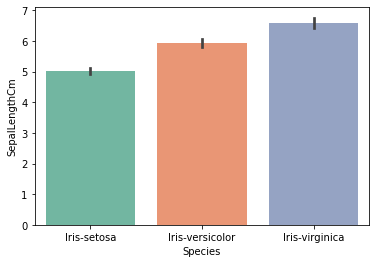

In [4]:
sns.set_palette(sns.color_palette("Set2"))
ax=sns.barplot(dataset['Species'],dataset['SepalLengthCm'])
ax.set_xlabel("Species")
ax.set_ylabel("SepalLengthCm")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


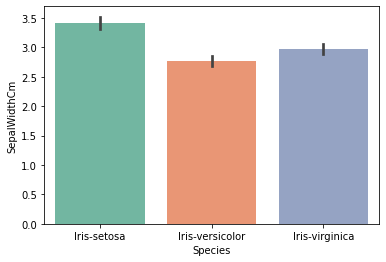

In [5]:
sns.set_palette(sns.color_palette("Set2"))
ax=sns.barplot(dataset['Species'],dataset['SepalWidthCm'])
ax.set_xlabel("Species")
ax.set_ylabel("SepalWidthCm")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


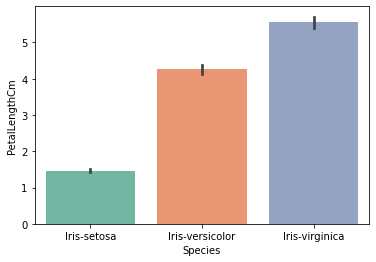

In [6]:
sns.set_palette(sns.color_palette("Set2"))
ax=sns.barplot(dataset['Species'],dataset['PetalLengthCm'])
ax.set_xlabel("Species")
ax.set_ylabel("PetalLengthCm")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


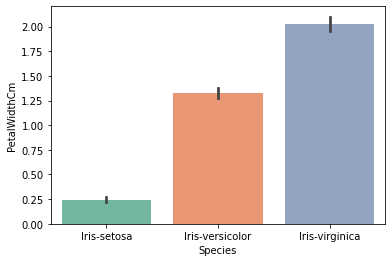

In [7]:
sns.set_palette(sns.color_palette("Set2"))
ax=sns.barplot(dataset['Species'],dataset['PetalWidthCm'])
ax.set_xlabel("Species")
ax.set_ylabel("PetalWidthCm")
plt.show()

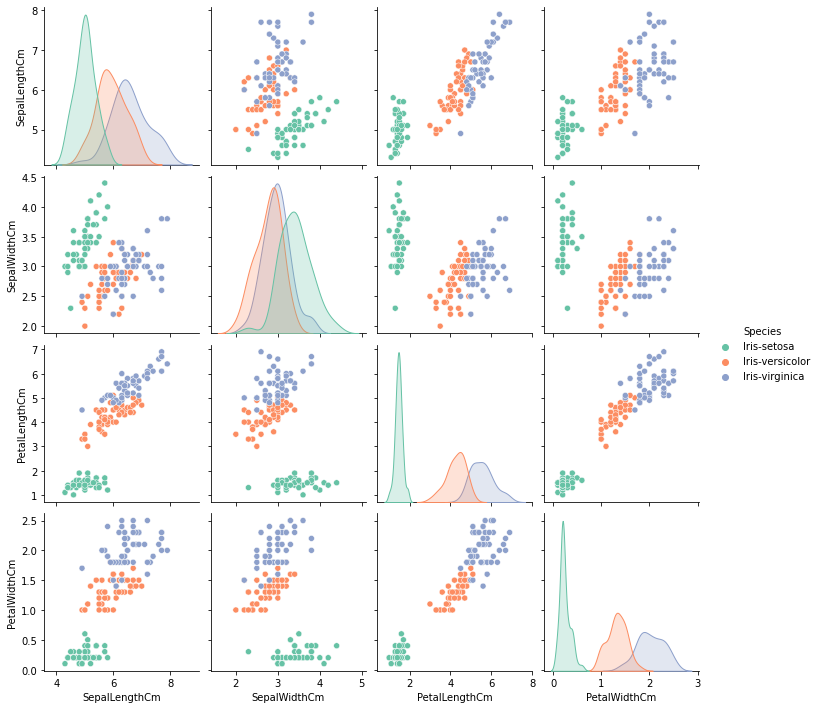

In [8]:
# Plotting the bivariate relationships between variables in our dataset
sns.pairplot(dataset,hue="Species")
plt.show()

## Dividing the dataset into independent and dependent datasets 

In [9]:
X=dataset.iloc[:,1:-1]
y=dataset.iloc[:,-1]

## Encoding the dependent variable using Label Encoder

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)  

## Creating an object containing feature names of the dataset

In [11]:
feature_name=X.columns
feature_name

Index(['SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

## Splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Decision Tree Classification model on the Training set

In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## Visualising the Decision Tree

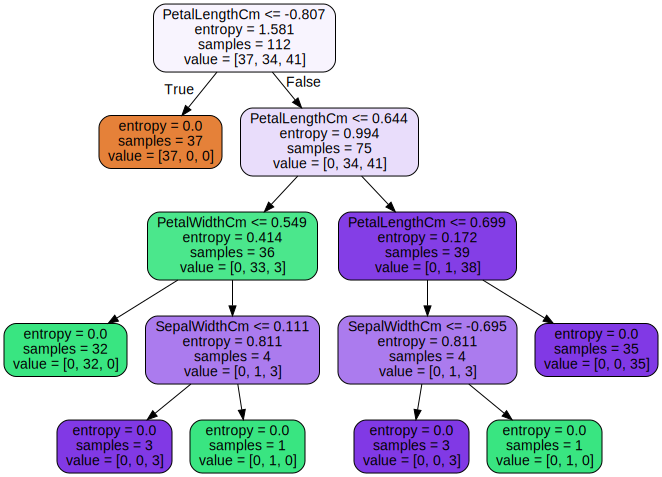

In [15]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(classifier, out_file=None, 
                                feature_names=feature_name,
                                filled=True,
                                rounded=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

## Calculating the Confusion Matrix and the Accuracy Score

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('The Confusion Matrix is:\n{}'.format(confusion_matrix(y_test, y_pred)))
print('The Accuracy Score is:', accuracy_score(y_test, y_pred))

The Confusion Matrix is:
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
The Accuracy Score is: 0.9736842105263158
